# Project: Investigate a Dataset No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
* __'ScheduledDay'__ ’ tells us on what day the patient set up their appointment.
* __'Neighborhood'__ indicates the location of the hospital.
* __'Scholarship'__ indicates whether or not the patient enrolled in Brasilian welfare program __<a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Família</a>__.
* __Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.__

>  We will try to understand What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_show_app.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Caculate the number of patient (in rows) and show thier information (columns)
df.shape

(110527, 14)

In [4]:
# Check for Null Values and Duplicates
pd.isna(df).sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#show data types and look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# get Statistics from data like max age and min etc,,
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### We can see that 
* Max Age is 115 year
* Min Age is -1 year and this is not possible 
* The mean of ages is 37 year but this is not real mean because of the value in age not make sense

So lets Check the non sense age


In [7]:
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


### Data Cleaning

In [8]:
# After Review our data and check for missing data we may not need the patient ID, Appointment ID, Dates and we can remove them.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace=True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# fix typo in data 
df.rename(columns={'Hipertension':'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# fix age by removing the 0 age patient as it just percent 3% of data 
df.drop(df.loc[df['Age']<=0].index, inplace=True)
df.shape

(106987, 10)

In [11]:
# convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby
pd.options.mode.chained_assignment = None
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

In [12]:
# create a mask for people who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the overall appointment show-up vs. no show-up rate?)

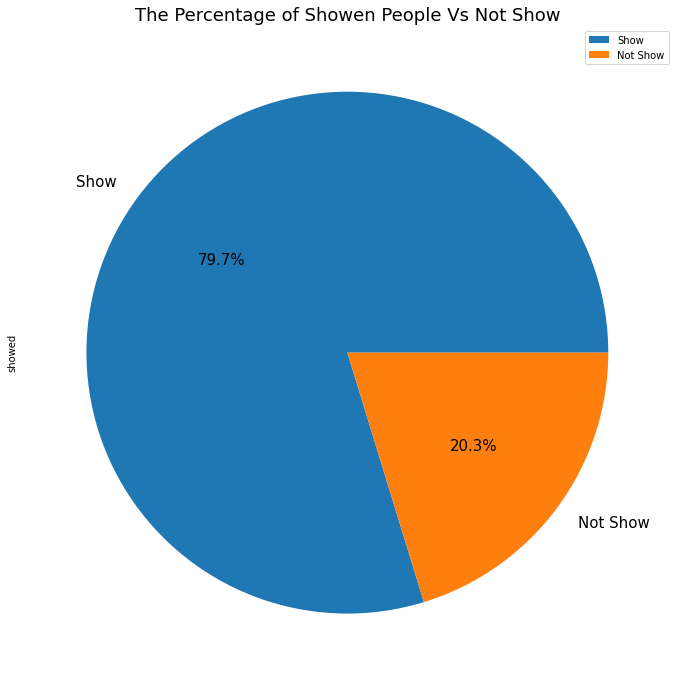

In [13]:
showedpie = df['showed'].value_counts()
showedpie.plot.pie(figsize=(12,12),labels=['Show','Not Show'],autopct='%1.1f%%',fontsize=15)
plt.title('The Percentage of Showen People Vs Not Show', fontsize = 18)
plt.legend();


### Research Question 2  (Is There any corrolation between patient showing or not showing and there characteristics such as gender, chronic etc,,?)

Gender
F    0.796415
M    0.799154
Name: showed, dtype: float64


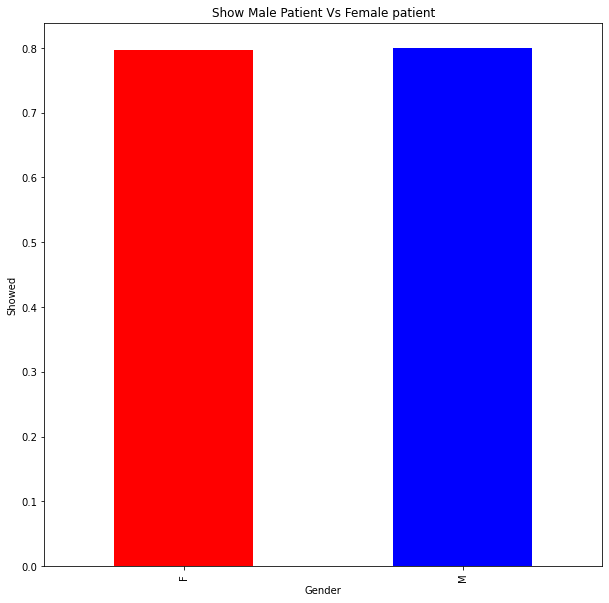

In [14]:
# Show the corrolation between patient gender and showin or not 
age_show = df.groupby('Gender')['showed'].mean()
age_show.plot(kind='bar',figsize=(10,10), color=['Red','Blue'],stacked=True)
plt.title('Show Male Patient Vs Female patient')
plt.ylabel("Showed")
plt.xlabel("Gender");
print(df.groupby('Gender')['showed'].mean())

Alcoholism
0    0.797321
1    0.798512
Name: showed, dtype: float64


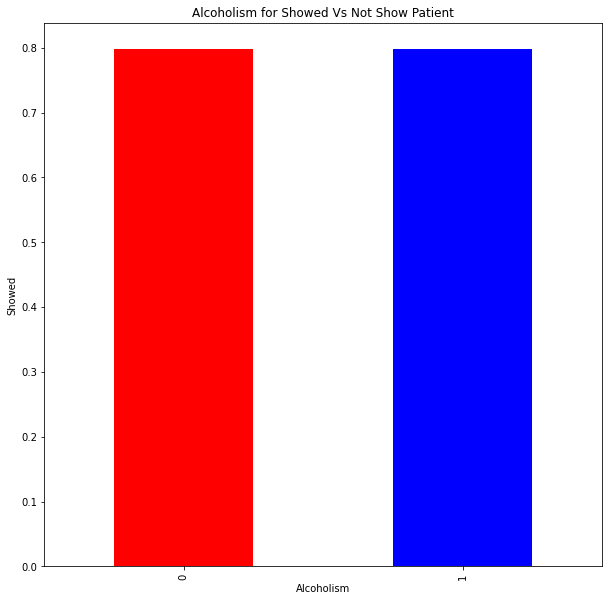

In [15]:
#see the relation between alcoholic people and people who showed up and who didn't
alcholic_show = df.groupby('Alcoholism')['showed'].mean()
alcholic_show.plot(kind='bar',figsize=(10,10), color=['Red','Blue'])
plt.title('Alcoholism for Showed Vs Not Show Patient')
plt.ylabel("Showed")
plt.xlabel("Alcoholism");
print(df.groupby('Alcoholism')['showed'].mean())

SMS_received
0    0.832712
1    0.723348
Name: showed, dtype: float64


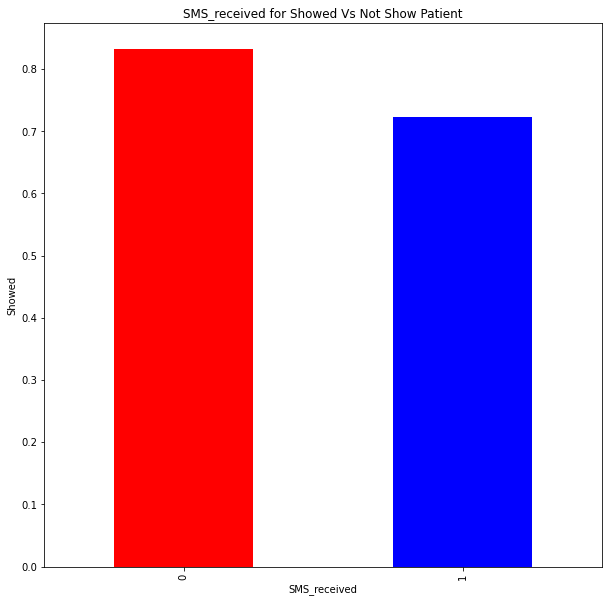

In [16]:
#see the relation between SMS_received people and people who showed up and who didn't
SMS_received_show = df.groupby('SMS_received')['showed'].mean()
SMS_received_show.plot(kind='bar',figsize=(10,10), color=['Red','Blue'])
plt.title('SMS_received for Showed Vs Not Show Patient')
plt.ylabel("Showed")
plt.xlabel("SMS_received");
print(df.groupby('SMS_received')['showed'].mean())

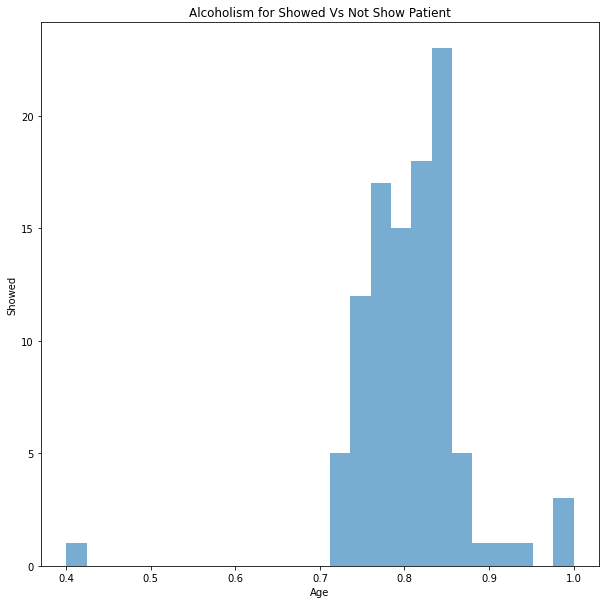

In [17]:
age_show = df.groupby('Age')['showed'].mean()
age_show.plot(kind='hist',figsize=(10,10), bins=25,alpha=0.6,label='show')
plt.title('Alcoholism for Showed Vs Not Show Patient')
plt.ylabel("Showed")
plt.xlabel("Age");

<a id='conclusions'></a>
## Conclusions

* As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come
* the features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not
* As we can see in our investigation the Age is the most important factor that decided if a patient would come or not

### Limitations
* There was non_logical data like age 0 or lower -1 
* if there more data like employment status or health checkup score from historical data it will be better

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295